In [1]:
!pip install pandas matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('adam_mup.csv')

In [4]:
# print col naems
print(df.columns)

Index(['Name', 'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime', 'Sweep',
       'hidden_size', 'input_size', 'lr', 'num_classes', 'num_epochs',
       'optimizer', 'prefactor', 'use_mup', 'act mean(abs(a1))',
       'act mean(abs(a2))', 'act mean(abs(a3))', 'act mean(abs(h1))',
       'act mean(abs(h2))', 'act norm a1', 'act norm a2', 'act norm a3',
       'act norm h1', 'act norm h2', 'epoch',
       'grad mean(abs(grad_fc1.weight))', 'grad mean(abs(grad_fc2.weight))',
       'grad mean(abs(grad_fc3.weight))', 'grad norm fc1.weight',
       'grad norm fc2.weight', 'grad norm fc3.weight', 'test_acc', 'test_loss',
       'train_loss', 'trainer/global_step', 'val_acc', 'val_loss'],
      dtype='object')


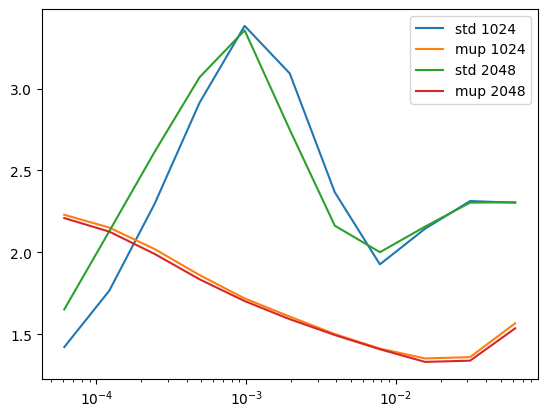

In [5]:
# plot df data: x-axis use the 'lr' column, y-axis use the 'test_loss' column
# group by the different width values and use_mup flags
# plot the test loss of each group
# use different colors for each group
df2 = df.groupby(['hidden_size', 'use_mup'])
for name, group in df2:
    # use log2 scale for x-axis
    if name[1]:
        label = f'mup {name[0]}'
    else:
        label = f'std {name[0]}'
    plt.semilogx(group['lr'], group['test_loss'], label=label)
plt.legend()

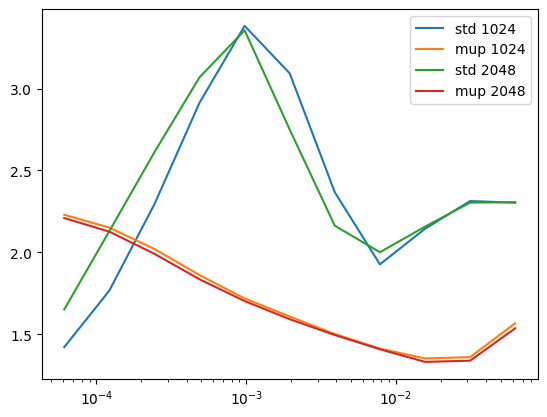

In [6]:
df2 = df.groupby(['hidden_size', 'use_mup'])
for name, group in df2:
    # use log2 scale for x-axis
    if name[1]:
        label = f'mup {name[0]}'
    else:
        label = f'std {name[0]}'
    plt.semilogx(group['lr'], group['val_loss'], label=label)
plt.legend()

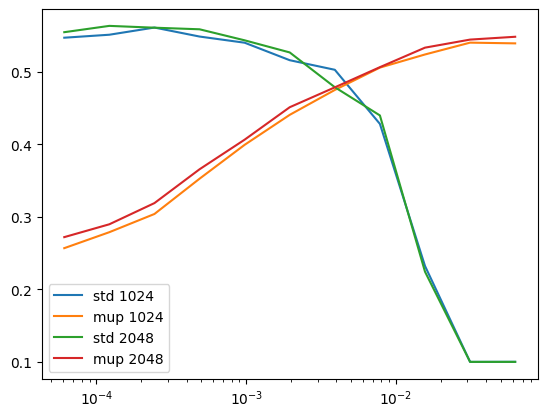

In [7]:
df2 = df.groupby(['hidden_size', 'use_mup'])
for name, group in df2:
    # use log2 scale for x-axis
    if name[1]:
        label = f'mup {name[0]}'
    else:
        label = f'std {name[0]}'
    plt.semilogx(group['lr'], group['test_acc'], label=label)
plt.legend()

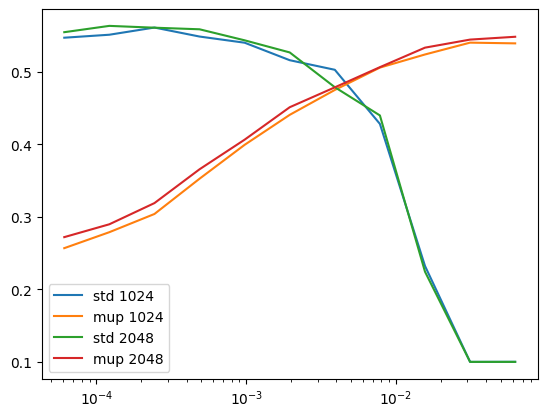

In [8]:
df2 = df.groupby(['hidden_size', 'use_mup'])
for name, group in df2:
    # use log2 scale for x-axis
    if name[1]:
        label = f'mup {name[0]}'
    else:
        label = f'std {name[0]}'
    plt.semilogx(group['lr'], group['val_acc'], label=label)
plt.legend()